In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *

In [3]:
plt.style.use(["dark_background"])

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

# Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [4]:
n=100

In [5]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.5080,  1.0000],
        [-0.8655,  1.0000],
        [ 0.0905,  1.0000],
        [-0.9029,  1.0000],
        [-0.7198,  1.0000]])

In [6]:
a = tensor(3.,2); a

tensor([3., 2.])

In [7]:
y = x@a + torch.rand(n)

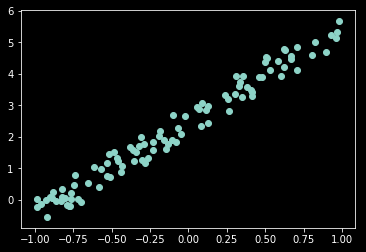

In [8]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [9]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [10]:
a = tensor(-1.,1)

In [11]:
y_hat = x@a
mse(y_hat, y)

tensor(6.3130)

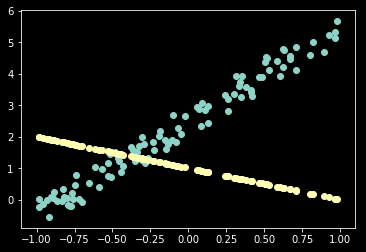

In [12]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [13]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [14]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [15]:
lr = 1e-1
for t in range(100): update()

tensor(6.3130, grad_fn=<MeanBackward1>)
tensor(1.5456, grad_fn=<MeanBackward1>)
tensor(0.4768, grad_fn=<MeanBackward1>)
tensor(0.1902, grad_fn=<MeanBackward1>)
tensor(0.1128, grad_fn=<MeanBackward1>)
tensor(0.0919, grad_fn=<MeanBackward1>)
tensor(0.0863, grad_fn=<MeanBackward1>)
tensor(0.0847, grad_fn=<MeanBackward1>)
tensor(0.0843, grad_fn=<MeanBackward1>)
tensor(0.0842, grad_fn=<MeanBackward1>)


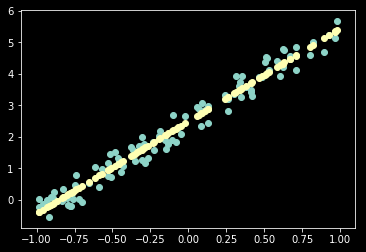

In [16]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [17]:
from matplotlib import animation, rc
rc('animation', html='html5')

You'll need to uncomment the following to install the necessary plugin the first time you run this:

In [18]:
#! sudo add-apt-repository ppa:mc3man/trusty-media  
#! sudo apt-get update  
#! sudo apt-get install ffmpeg  
#! sudo apt-get install frei0r-plugins 

In [19]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

# Extension: Visualizing in 3D plot

>[Speeding up your code (2): vectorizing the loops with Numpy](https://hackernoon.com/speeding-up-your-code-2-vectorizing-the-loops-with-numpy-e380e939bed3)

In [20]:
from mpl_toolkits.mplot3d import Axes3D

In [21]:
def loss_fn(w0, w1):
    w = torch.Tensor([w0, w1])
    yp = x@w
    return mse(yp, y)

loss_vec = np.vectorize(loss_fn)

## Loss Domain

In [22]:
w0s = np.linspace(-20, 20, 50)
w1s = np.linspace(-20, 20, 50)
mesh = np.meshgrid(w0s, w1s)
loss = loss_vec(*mesh)

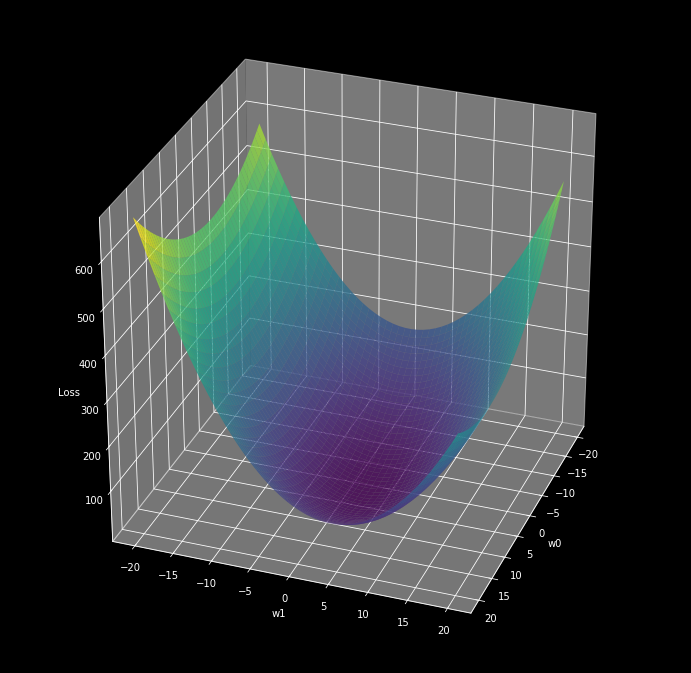

In [23]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.plot_surface(*mesh, loss, cmap='viridis', alpha=0.8)
ax.set_xlabel('w0'); ax.set_ylabel('w1'); ax.set_zlabel('Loss')
ax.view_init(30, 20)

## Gradient Descent

In [24]:
lr = 1.001
eps = 100
w = torch.tensor([-18., -18.], requires_grad=True)

In [25]:
def update(w):
    y_hat = x@w
    loss = mse(y, y_hat)
    prev_w = w.data.clone()  
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        w.grad.zero_()
    return prev_w, loss.item()

In [26]:
recorder = []
for t in range(eps): recorder.append(update(w))
rec_w, rec_loss = [list(o) for o in zip(*recorder)]
rec_w = torch.stack(rec_w)

In [27]:
rec_w[:5], rec_loss[:5]

(tensor([[-18.0000, -18.0000],
         [ -8.1775,  18.8960],
         [  2.4331, -16.1318],
         [ -0.9105,  21.0639],
         [  5.3148, -16.8672]]),
 [480.6246032714844,
  345.9413146972656,
  345.3573303222656,
  363.8345947265625,
  386.0199890136719])

## Animate

In [ ]:
from matplotlib import animation
from matplotlib.gridspec import GridSpec
plt.rc('animation', html='html5')

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [ ]:
#fig = plt.figure()
#gs = GridSpec(3, 3)
#ax0 = plt.subplot(gs[0, :])
#ax1 = plt.subplot(gs[1, :-1])
#ax2 = plt.subplot(gs[1:, -1])
#ax3 = plt.subplot(gs[-1, 0])
#ax4 = plt.subplot(gs[-1, -2])
##fig.tight_layout()

In [ ]:
fig = plt.figure(figsize=(14, 8))
ttl = fig.suptitle(f'LR: {lr} - Epoch: 0/{eps}', fontsize=22)
gs  = GridSpec(2, 2, width_ratios=[1, 2.5])
ax0 = plt.subplot(gs[0,0])
ax1 = plt.subplot(gs[:,1], projection='3d')
ax2 = plt.subplot(gs[1,0])

ax0.scatter(x[:,0], y, c='orange', label='Ground truth')
ax0.set_title('Ground truth & Model', fontsize=16)
ax0.set_ylim(-1, 6)
ax0.legend(loc='lower right')
line0, = ax0.plot([], [], label='Model')

ax1.plot_surface(*mesh, loss, cmap='viridis', alpha=.7)
ax1.set_title('Loss', fontsize=16, pad=20)
ax1.plot3D([w[0]], [w[1]], [0], c='r', marker='x', markersize=10, label='Global minimum', linewidth=0)
ax1.set_xlabel('w0');
ax1.set_ylabel('w1');
ax1.set_zlabel('Loss')
ax1.view_init(30, 20)
ax1.legend(loc='upper right')
line1, = ax1.plot3D([], [], [], c='r', marker='o', alpha=0.4, label='loss')

ax2.set_title('Weights & Loss', fontsize=16)
ax2.set_xlim(0, eps); ax2.set_xlabel('epochs');
ax2.set_ylim(-20, 5); ax2.set_ylabel('weights')
ax2.legend((line2, line3, line4), ('w0', 'w1', 'loss'), loc='center right')
ax3 = ax2.twinx()
ax3.set_ybound(0, 500)
ax3.set_ylabel('loss')
line2, = ax2.plot([],[], label='w0')
line3, = ax2.plot([],[], label='w1')
line4, = ax3.plot([],[], label='loss', c='r')

fig.tight_layout()
fig.subplots_adjust(top=0.85)
plt.close()

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr0001.mp4', writer=writer)

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr01.mp4', writer=writer)

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr05.mp4', writer=writer)

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr07.mp4', writer=writer)

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr09.mp4', writer=writer)

In [ ]:
def animate(i):   
    line0.set_data(x[:,0].numpy(), (x@rec_w[i]).numpy())
    line1.set_data(rec_w[:i+1,0].numpy(), rec_w[:i+1,1].numpy())
    line1.set_3d_properties(rec_loss[:i+1])
    epochs = np.arange(i+1)
    line2.set_data(epochs, rec_w[:i+1, 0].numpy())
    line3.set_data(epochs, rec_w[:i+1, 1].numpy())
    line4.set_data(epochs, rec_loss[:i+1])
    ttl.set_text(f'LR: {lr} - Epoch: {i+1}/{eps}')
    return line0, line1, line2, line3, line4, ttl

ani = animation.FuncAnimation(fig, animate, range(eps), interval=40)
ani

In [ ]:
ani.save('src/lr1001.mp4', writer=writer)

## 

In [28]:
from IPython.display import Video

In [33]:
display(Video('src/lr0001.mp4'))
display(Video('src/lr01.mp4'))
display(Video('src/lr05.mp4'))
display(Video('src/lr07.mp4'))
display(Video('src/lr09.mp4'))
display(Video('src/lr1001.mp4'))